In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib

from transformers import (
    BertTokenizer,
    BertForSequenceClassification,
    pipeline,
)

In [2]:
def display_confusion_matrix(labels, label_predictions):
    disp = ConfusionMatrixDisplay(confusion_matrix(labels, label_predictions))
    disp.plot(cmap=plt.cm.Reds)
    plt.title("Confusion matrix", color="red")
    plt.xlabel('Predicted Label',color='black')
    plt.ylabel('True Label',color='black')
    plt.gcf().axes[0].tick_params(color="black")
    plt.gcf().axes[1].tick_params(color="black")
    plt.gcf().set_size_inches(10,6)

In [3]:
test_data = pd.read_csv("../data/processed/test.csv")
features = test_data.drop(["completion"], axis=1)
labels = test_data["completion"]

In [4]:
label_mapping = {
    'Clinical pharmacology': 0,
    'Dental care': 1,
    'Emergency medical care': 2,
    'General medical care': 3,
    'Infectious disease care': 4,
    'Internal medicine care': 5,
    'Laboratory services': 6,
    'Nuclear medicine': 7,
    'Occupational and sports medicine': 8,
    'Oncological care': 9,
    'Ophthalmological care': 10,
    'Otorhinolaryngological care': 11,
    'Pediatric care': 12,
    'Physical medicine and rehabilitation': 13,
    'Psychological and psychiatric care': 14,
    'Radiological diagnostics': 15,
    'Reproductive medicine': 16,
    'Specialized clinics': 17,
    'Surgical care': 18,
    "Women's health": 19
 }

In [5]:
labels.value_counts()

completion
13    11
4     10
5      9
17     9
6      9
7      8
8      8
16     8
19     8
3      6
9      6
11     6
10     5
15     5
12     5
18     5
0      4
2      4
1      3
14     3
Name: count, dtype: int64

### Random Forest

In [6]:
model = joblib.load("../models/randomforest.pkl")
label_predictions = model.predict(features)

Standard metrics

In [7]:
print(classification_report(labels, label_predictions))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      1.00      0.67         3
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         6
           4       1.00      1.00      1.00        10
           5       0.44      0.44      0.44         9
           6       0.69      1.00      0.82         9
           7       0.88      0.88      0.88         8
           8       0.89      1.00      0.94         8
           9       0.50      0.67      0.57         6
          10       0.75      0.60      0.67         5
          11       1.00      0.17      0.29         6
          12       0.71      1.00      0.83         5
          13       1.00      0.27      0.43        11
          14       0.11      0.33      0.17         3
          15       0.83      1.00      0.91         5
          16       0.75      0.75      0.75         8
          17       1.00    

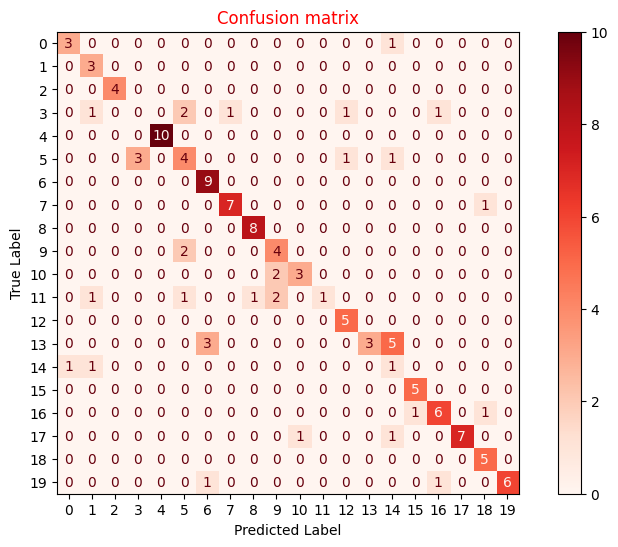

In [8]:
display_confusion_matrix(labels, label_predictions)

### Logistic Regression

In [9]:
model = joblib.load("../models/logreg.pkl")
label_predictions = model.predict(features)

Standard metrics

In [10]:
print(classification_report(labels, label_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.50      1.00      0.67         3
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         6
           4       0.83      1.00      0.91        10
           5       0.50      0.56      0.53         9
           6       0.80      0.89      0.84         9
           7       0.70      0.88      0.78         8
           8       0.73      1.00      0.84         8
           9       0.67      0.33      0.44         6
          10       0.33      0.40      0.36         5
          11       0.00      0.00      0.00         6
          12       1.00      1.00      1.00         5
          13       0.73      0.73      0.73        11
          14       0.33      0.67      0.44         3
          15       0.83      1.00      0.91         5
          16       0.86      0.75      0.80         8
          17       1.00    

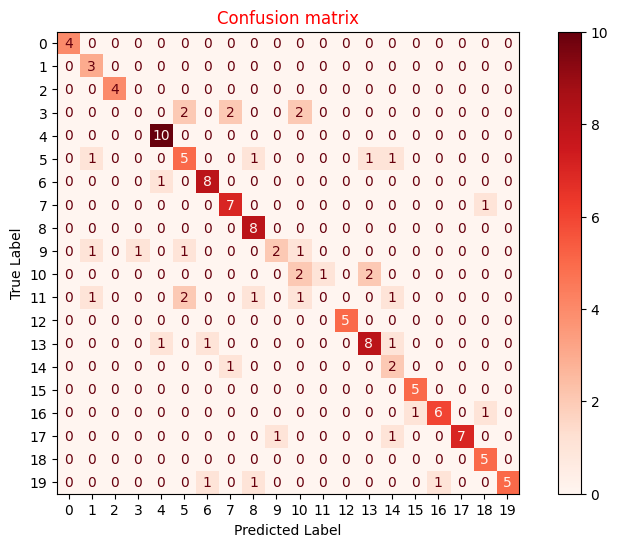

In [11]:
display_confusion_matrix(labels, label_predictions)

### Multinomial Naive Bayes

In [12]:
model = joblib.load("../models/multinomialnb.pkl")
label_predictions = model.predict(features)

Standard metrics

In [13]:
print(classification_report(labels, label_predictions))

              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.40      0.67      0.50         3
           2       0.25      0.25      0.25         4
           3       0.00      0.00      0.00         6
           4       0.83      1.00      0.91        10
           5       0.50      0.56      0.53         9
           6       0.88      0.78      0.82         9
           7       0.75      0.75      0.75         8
           8       0.88      0.88      0.88         8
           9       0.75      0.50      0.60         6
          10       0.50      0.20      0.29         5
          11       0.00      0.00      0.00         6
          12       0.57      0.80      0.67         5
          13       1.00      0.55      0.71        11
          14       0.00      0.00      0.00         3
          15       0.56      1.00      0.71         5
          16       0.71      0.62      0.67         8
          17       0.78    

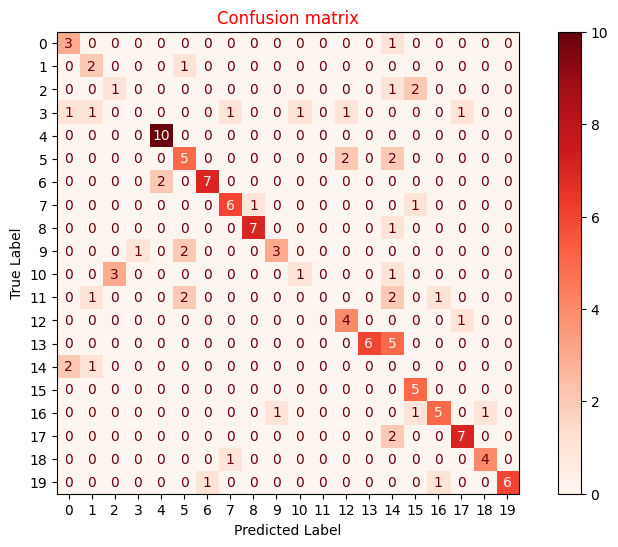

In [14]:
display_confusion_matrix(labels, label_predictions)

### XGBoost

In [15]:
model = joblib.load("../models/xgboost.pkl")
label_predictions = model.predict(features)

Standard metrics

In [16]:
print(classification_report(labels, label_predictions))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.50      0.67      0.57         3
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         6
           4       1.00      1.00      1.00        10
           5       0.55      0.67      0.60         9
           6       0.78      0.78      0.78         9
           7       1.00      0.75      0.86         8
           8       0.89      1.00      0.94         8
           9       0.57      0.67      0.62         6
          10       0.30      0.60      0.40         5
          11       0.00      0.00      0.00         6
          12       0.80      0.80      0.80         5
          13       0.00      0.00      0.00        11
          14       0.15      0.67      0.25         3
          15       1.00      1.00      1.00         5
          16       0.86      0.75      0.80         8
          17       0.71    

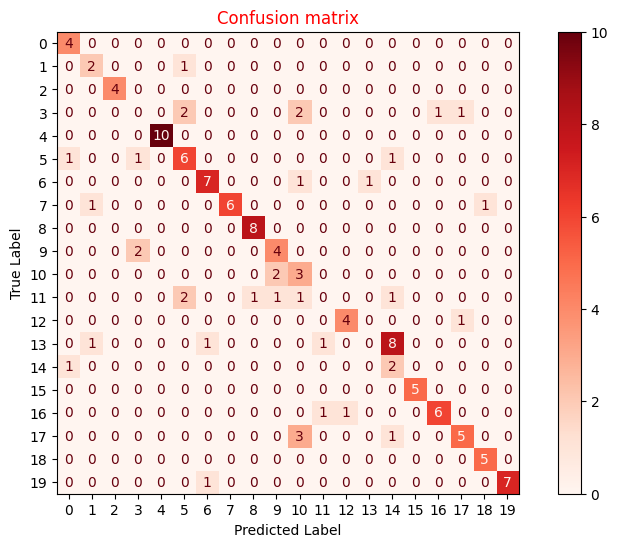

In [17]:
display_confusion_matrix(labels, label_predictions)

### BioBERT

In [18]:
#test_data = pd.read_csv("../data/processed/test_bert.csv")

In [19]:
#model = BertForSequenceClassification.from_pretrained("../models/biobert", num_labels=8)
#tokenizer = BertTokenizer.from_pretrained("../models/biobert/tokenizer")
#pipe = pipeline(task="text-classification", model=model, tokenizer=tokenizer)
#label_predictions = pipe(test_data["text"].tolist())

In [20]:
#label_predictions = [int(label["label"][-1]) for label in label_predictions]

Standard metrics

In [21]:
#print(classification_report(labels, label_predictions))

In [22]:
#display_confusion_matrix(labels, label_predictions)